<a href="https://colab.research.google.com/github/Lalithasri73/cognifyz-task-1-with-restaurent-dataset/blob/main/Cognifyz_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [3]:
restaurant_data=pd.read_csv(r"/content/Dataset .csv")
restaurant_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
drop=restaurant_data.iloc[0:,0:10]
restaurant_data.drop(drop,axis=1,inplace=True)

In [7]:
restaurant_data.drop("Currency",axis=1,inplace=True)

In [8]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Switch to order menu  9551 non-null   object 
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating color          9551 non-null   object 
 8   Rating text           9551 non-null   object 
 9   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 746.3+ KB


In [9]:
restaurant_data.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [10]:
restaurant_data.isnull().sum()

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Switch to order menu  9551 non-null   object 
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating color          9551 non-null   object 
 8   Rating text           9551 non-null   object 
 9   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 746.3+ KB


In [12]:
label_encoder = LabelEncoder()
for column in restaurant_data.columns:
    if restaurant_data[column].dtype == 'object':
        restaurant_data[column] = label_encoder.fit_transform(restaurant_data[column])

<Axes: ylabel='count'>

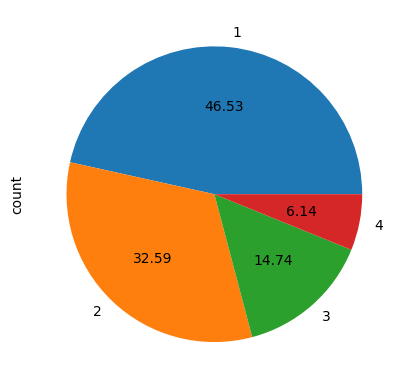

In [13]:
restaurant_data['Price range'].value_counts().plot(kind='pie', autopct = '%.2f')

In [14]:
x = restaurant_data.drop('Aggregate rating', axis=1)
y = restaurant_data['Aggregate rating']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=256)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9772070324023563

In [17]:
DTree = DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(x_train, y_train)
y_predict = DTree.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (RMSE): {mse:.2f}")
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (RMSE): 0.05
R-squared (R2) Error: 0.98
